<a href="https://colab.research.google.com/github/nurefsanoztekin/datan/blob/main/7_8_HAFTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = ["ID","No_Pation","Gender", "AGE", "Urea", "Cr","HbA1c","Chol", "TG","HDL","LDL","VLDL","BMI", "Class"] 

data = pd.read_csv("https://raw.githubusercontent.com/nurefsanoztekin/datan/main/Dataset%20of%20Diabetes%20.csv", names= features, header=0)
data.sample(13)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
702,697,34495,F,51,4.50,34,10.4,4.7,2.50,3.4,1.1,1.5,37.00,Y
686,473,34490,M,60,5.00,55,10.0,4.5,1.30,0.9,3.0,0.6,33.00,Y
580,142,34447,F,59,6.20,68,8.1,5.5,2.20,0.7,2.0,1.5,33.00,Y
861,21,7523,F,44,3.60,59,9.1,5.4,2.40,1.1,3.2,1.1,23.00,Y
368,371,24095,M,52,8.00,66,11.0,4.0,1.10,0.8,3.5,0.8,28.00,Y
536,32,45752,M,68,7.10,79,9.4,3.7,3.70,0.8,1.4,1.6,31.00,Y
867,27,51677,F,55,5.80,41,9.7,5.0,4.50,1.1,2.2,2.0,28.00,Y
403,628,8554,M,55,3.66,67,7.0,5.6,1.91,1.3,3.5,13.1,39.18,Y
825,313,34567,M,61,4.10,57,9.4,3.7,1.50,0.7,4.6,2.0,33.00,Y
90,154,45369,M,30,5.50,79,5.6,3.9,1.60,0.9,3.3,0.8,24.50,N


In [7]:
data = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 
data

,F1,F2,F3,F4,F5,F6,F7
0,3.004106,1.845042,-2.482046,9.986370,20.523143,4.662178,8.568613
1,2.844255,5.142464,-3.231382,8.937085,20.445048,1.061943,9.952277
2,2.929248,4.850952,-3.013484,9.807030,27.708955,4.011861,9.650021
3,2.759528,4.055458,-0.376310,4.931625,19.186417,-3.785054,10.120042
4,2.950040,3.444051,-1.022026,7.074867,23.174458,-1.840654,7.102239
5,2.804299,5.641991,-0.772840,10.123208,22.167388,0.371142,9.009478
6,2.888994,5.068800,-1.151728,4.429753,27.729107,3.161404,8.530274
7,3.109777,5.929277,2.265323,8.999885,31.782454,6.270574,10.357844
8,3.185789,5.461080,1.878472,9.340940,25.009926,-4.199837,8.871381
9,3.147671,4.354656,-5.844079,8.732318,25.551659,0.820645,11.390538


In [8]:
describtion = data.describe().T
describtion

,count,mean,std,min,25%,50%,75%,max
F1,15.0,2.932828,0.179351,2.519994,2.827228,2.929248,3.061501,3.185789
F2,15.0,4.937711,1.203257,1.845042,4.389218,5.142464,5.642379,6.670260
F3,15.0,-1.749576,2.787234,-6.285630,-3.261387,-2.482046,-0.574575,3.487398
F4,15.0,7.818400,1.971112,4.429753,6.350918,8.732318,9.282082,10.123208
F5,15.0,24.623812,3.479503,19.186417,22.038252,24.720157,27.546446,31.782454
F6,15.0,0.392109,4.220295,-9.442758,-1.482029,0.371142,3.586632,6.270574
F7,15.0,9.005329,1.229942,7.102239,8.146441,8.871381,9.983154,11.390538


In [9]:
describtion["std"]*describtion["std"]

F1     0.032167
F2     1.447827
F3     7.768671
F4     3.885284
F5    12.106942
F6    17.810893
F7     1.512757
Name: std, dtype: float64

In [10]:
Variance_Threshold_FS = VarianceThreshold(threshold=1)
Variance_Threshold_FS.fit(data)

VarianceThreshold(threshold=1)

In [11]:
Variance_Threshold_FS.get_support()

array([False,  True,  True,  True,  True,  True,  True])

In [12]:
data.columns[Variance_Threshold_FS.get_support()]

Index(['F2', 'F3', 'F4', 'F5', 'F6', 'F7'], dtype='object')

In [13]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[Variance_Threshold_FS.get_support()]]

print(len(constant_columns))

1


In [14]:
for feature in constant_columns:
     print(feature)

F1


In [15]:
Variance_Threshold_data = data.drop(constant_columns,axis=1)
Variance_Threshold_data

,F2,F3,F4,F5,F6,F7
0,1.845042,-2.482046,9.986370,20.523143,4.662178,8.568613
1,5.142464,-3.231382,8.937085,20.445048,1.061943,9.952277
2,4.850952,-3.013484,9.807030,27.708955,4.011861,9.650021
3,4.055458,-0.376310,4.931625,19.186417,-3.785054,10.120042
4,3.444051,-1.022026,7.074867,23.174458,-1.840654,7.102239
5,5.641991,-0.772840,10.123208,22.167388,0.371142,9.009478
6,5.068800,-1.151728,4.429753,27.729107,3.161404,8.530274
7,5.929277,2.265323,8.999885,31.782454,6.270574,10.357844
8,5.461080,1.878472,9.340940,25.009926,-4.199837,8.871381
9,4.354656,-5.844079,8.732318,25.551659,0.820645,11.390538


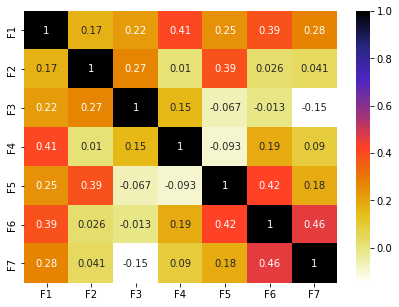

In [16]:
plt.figure(figsize=(7,5))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(data, 0.5)
len(set(corr_features))

0

In [19]:
corr_features

set()

In [20]:
Correlation_Coefficient_data = data.drop(corr_features,axis=1)
Correlation_Coefficient_data

,F1,F2,F3,F4,F5,F6,F7
0,3.004106,1.845042,-2.482046,9.986370,20.523143,4.662178,8.568613
1,2.844255,5.142464,-3.231382,8.937085,20.445048,1.061943,9.952277
2,2.929248,4.850952,-3.013484,9.807030,27.708955,4.011861,9.650021
3,2.759528,4.055458,-0.376310,4.931625,19.186417,-3.785054,10.120042
4,2.950040,3.444051,-1.022026,7.074867,23.174458,-1.840654,7.102239
5,2.804299,5.641991,-0.772840,10.123208,22.167388,0.371142,9.009478
6,2.888994,5.068800,-1.151728,4.429753,27.729107,3.161404,8.530274
7,3.109777,5.929277,2.265323,8.999885,31.782454,6.270574,10.357844
8,3.185789,5.461080,1.878472,9.340940,25.009926,-4.199837,8.871381
9,3.147671,4.354656,-5.844079,8.732318,25.551659,0.820645,11.390538


In [21]:
F1 = np.random.normal(loc=50,scale=2,size=10) 
F2 = np.random.normal(loc=5,scale=1,size=10)
F3 = np.random.normal(loc=20,scale=3,size=10)
F4 = np.random.normal(loc=50,scale=2,size=10)
F5 = np.random.normal(loc=25,scale=3.5,size=10)
F6 = np.random.normal(loc=100,scale=5,size=10)
F7 = np.random.normal(loc=9,scale=1,size=10)

df1 = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 

F1_2 = np.random.normal(loc=80,scale=2,size=10) 
F2_2 = np.random.normal(loc=3,scale=1.5,size=10)
F3_2 = np.random.normal(loc=15,scale=3,size=10)
F4_2 = np.random.normal(loc=40,scale=2,size=10)
F5_2 = np.random.normal(loc=21,scale=3.5,size=10)
F6_2 = np.random.normal(loc=96,scale=5,size=10)
F7_2 = np.random.normal(loc=9,scale=1.2,size=10)

df2 = pd.DataFrame({"F1":F1_2, "F2":F2_2, "F3":F3_2, "F4":F4_2, "F5":F5_2, "F6":F6_2, "F7":F7_2})

data = pd.concat([df1, df2], ignore_index=True)

Label = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
data['Label'] = Label

data

,F1,F2,F3,F4,F5,F6,F7,Label
0,47.287713,5.662569,21.126877,52.752276,21.232325,95.917671,10.649032,0
1,47.983451,3.688987,17.006075,47.128697,20.267128,101.648193,9.533490,0
2,49.780716,5.343794,18.616262,52.311792,21.468066,89.977324,7.467657,0
3,49.369746,6.892943,13.675803,48.077896,25.324648,99.868997,9.118392,0
4,47.302952,4.799265,17.385307,49.745811,31.393854,106.096214,7.877196,0
5,48.921441,4.868643,20.766188,51.313835,21.782985,98.754877,7.832174,0
6,48.981953,5.706123,22.540275,52.327660,31.599254,98.986936,7.882490,0
7,49.844468,5.414604,19.686121,47.435068,23.015590,106.179637,8.078020,0
8,52.431824,5.028860,18.515589,49.966990,19.129574,103.940682,8.518208,0
9,50.720003,3.446096,22.834582,49.046686,22.984143,101.737748,9.088600,0


In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(["Label"], axis=1)
y = data[["Label"]]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [23]:
X_train

,F1,F2,F3,F4,F5,F6,F7
13,80.608355,4.415723,13.252561,39.371243,17.674498,102.799266,8.860223
6,48.981953,5.706123,22.540275,52.327660,31.599254,98.986936,7.882490
16,83.067551,7.011637,14.450228,39.301251,23.290296,102.550923,7.726798
1,47.983451,3.688987,17.006075,47.128697,20.267128,101.648193,9.533490
9,50.720003,3.446096,22.834582,49.046686,22.984143,101.737748,9.088600
14,80.291353,6.398944,13.480073,37.199290,17.008419,103.885872,8.167638
12,79.494915,3.444665,10.822830,43.244038,19.548187,98.458901,10.678205
5,48.921441,4.868643,20.766188,51.313835,21.782985,98.754877,7.832174
2,49.780716,5.343794,18.616262,52.311792,21.468066,89.977324,7.467657
4,47.302952,4.799265,17.385307,49.745811,31.393854,106.096214,7.877196


In [24]:
X_test

,F1,F2,F3,F4,F5,F6,F7
17,84.104048,3.513058,15.904580,36.570428,23.087446,100.151477,8.633566
19,80.128024,6.233161,17.416448,38.400105,18.764277,97.483807,9.061647
11,79.479790,2.381556,15.603393,39.567190,29.438129,89.631936,11.378804
18,79.043928,2.574333,12.998584,41.943195,18.515798,93.985051,11.199813


In [25]:
y_train

,Label
13,1
6,0
16,1
1,0
9,0
14,1
12,1
5,0
2,0
4,0


In [26]:
y_test

,Label
17,1
19,1
11,1
18,1


In [27]:
from sklearn.feature_selection import chi2

f_p_values = chi2(X_train,y_train)
f_p_values

(array([5.67711154e+01, 1.19306358e-01, 6.10949152e+00, 7.41121031e+00,
        1.06733587e+00, 1.56442702e-02, 1.92845728e-02]),
 array([4.89605340e-14, 7.29788021e-01, 1.34457806e-02, 6.48187031e-03,
        3.01547986e-01, 9.00462546e-01, 8.89553743e-01]))

In [28]:
p_values= pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

F1    4.896053e-14
F2    7.297880e-01
F3    1.344578e-02
F4    6.481870e-03
F5    3.015480e-01
F6    9.004625e-01
F7    8.895537e-01
dtype: float64

In [29]:
p_values.sort_index(ascending=False)

F7    8.895537e-01
F6    9.004625e-01
F5    3.015480e-01
F4    6.481870e-03
F3    1.344578e-02
F2    7.297880e-01
F1    4.896053e-14
dtype: float64

In [31]:
Chi2_data = data.drop(data[["F7"]],axis=1)
Chi2_data

,F1,F2,F3,F4,F5,F6,Label
0,47.287713,5.662569,21.126877,52.752276,21.232325,95.917671,0
1,47.983451,3.688987,17.006075,47.128697,20.267128,101.648193,0
2,49.780716,5.343794,18.616262,52.311792,21.468066,89.977324,0
3,49.369746,6.892943,13.675803,48.077896,25.324648,99.868997,0
4,47.302952,4.799265,17.385307,49.745811,31.393854,106.096214,0
5,48.921441,4.868643,20.766188,51.313835,21.782985,98.754877,0
6,48.981953,5.706123,22.540275,52.327660,31.599254,98.986936,0
7,49.844468,5.414604,19.686121,47.435068,23.015590,106.179637,0
8,52.431824,5.028860,18.515589,49.966990,19.129574,103.940682,0
9,50.720003,3.446096,22.834582,49.046686,22.984143,101.737748,0
